# Review 1: Data Collection & Preprocessing & Exploratory Data Analysis (EDA) 

## Data Collection & Sourcing

In [20]:
import pandas as pd
df = pd.read_csv('employee_performance_data.csv')


## Preprocessing: Cleaning and Handling Missing Values

In [21]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)


Missing values per column:
 EmployeeID               0
Age                      0
Gender                   0
Department               0
JobLevel                 0
YearsAtCompany           0
MonthlyIncome            0
PerformanceRating        0
TrainingTimesLastYear    0
OverTime                 0
WorkLifeBalance          0
JobSatisfaction          0
Attrition                0
dtype: int64


## Feature Selection and Engineering

In [22]:
df.drop(columns=["EmployeeID"], inplace=True)  # ID is non-informative

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Department'], drop_first=True)


## Ensuring Data Integrity and Consistency

In [23]:
print("Duplicates:", df.duplicated().sum())
print("Data types:\n", df.dtypes)


Duplicates: 0
Data types:
 Age                         int64
Gender                    float64
JobLevel                    int64
YearsAtCompany              int64
MonthlyIncome               int64
PerformanceRating           int64
TrainingTimesLastYear       int64
OverTime                    int64
WorkLifeBalance             int64
JobSatisfaction             int64
Attrition                   int64
Department_Engineering       bool
Department_Finance           bool
Department_HR                bool
Department_IT                bool
Department_Marketing         bool
Department_Sales             bool
dtype: object


## Summary Statistics & Insights

In [24]:
summary = df.describe()
summary


,Age,Gender,JobLevel,YearsAtCompany,MonthlyIncome,PerformanceRating,TrainingTimesLastYear,OverTime,WorkLifeBalance,JobSatisfaction,Attrition
count,1000.000000,954.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.445000,0.498952,2.983000,19.637000,11485.477000,3.12200,4.537000,0.293000,2.494000,2.527000,0.147000
std,11.499183,0.500261,1.416587,11.333123,4940.082859,0.88425,2.884953,0.455366,1.113195,1.134265,0.354283
min,21.000000,0.000000,1.000000,0.000000,3001.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,2.000000,10.000000,7320.500000,3.00000,2.000000,0.000000,1.000000,1.000000,0.000000
50%,41.000000,0.000000,3.000000,19.000000,11336.500000,3.00000,5.000000,0.000000,3.000000,3.000000,0.000000
75%,50.000000,1.000000,4.000000,29.000000,15979.750000,4.00000,7.000000,1.000000,3.000000,4.000000,0.000000
max,59.000000,1.000000,5.000000,39.000000,19999.000000,5.00000,9.000000,1.000000,4.000000,4.000000,1.000000


## Pattern Detection: Correlations & Trends

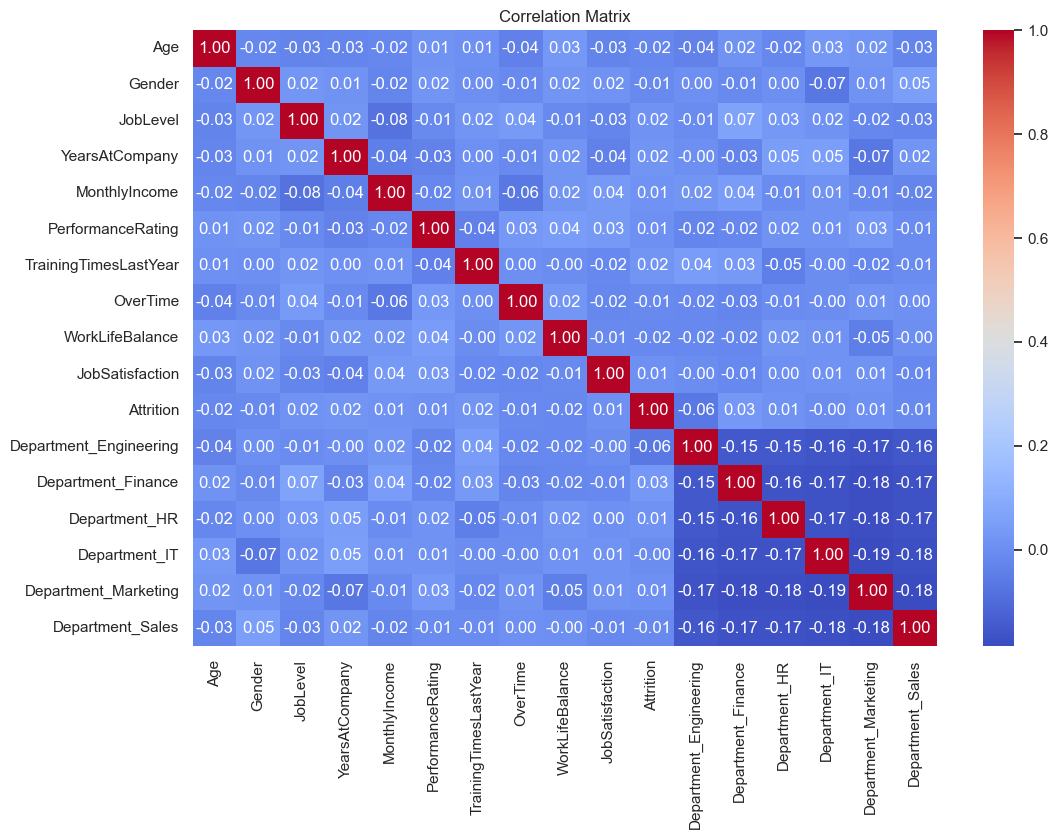

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Handling Outliers

In [26]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MonthlyIncome'] < Q1 - 1.5*IQR) | (df['MonthlyIncome'] > Q3 + 1.5*IQR)]
print(f"Outliers in MonthlyIncome: {len(outliers)}")


Outliers in MonthlyIncome: 0


## Initial Visual Representation: Charts and Insights

 Attrition by Department

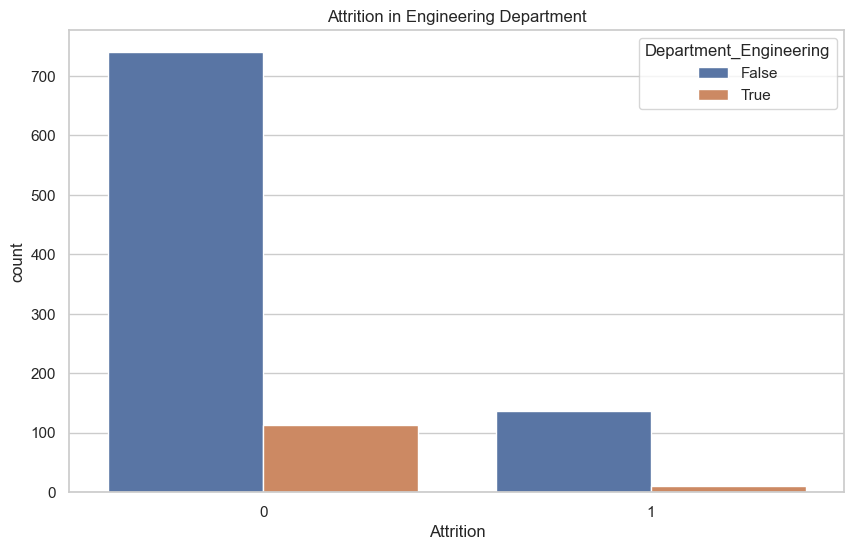

In [27]:
sns.countplot(x='Attrition', hue='Department_Engineering', data=df)
plt.title("Attrition in Engineering Department")
plt.show()


Monthly Income vs Attrition

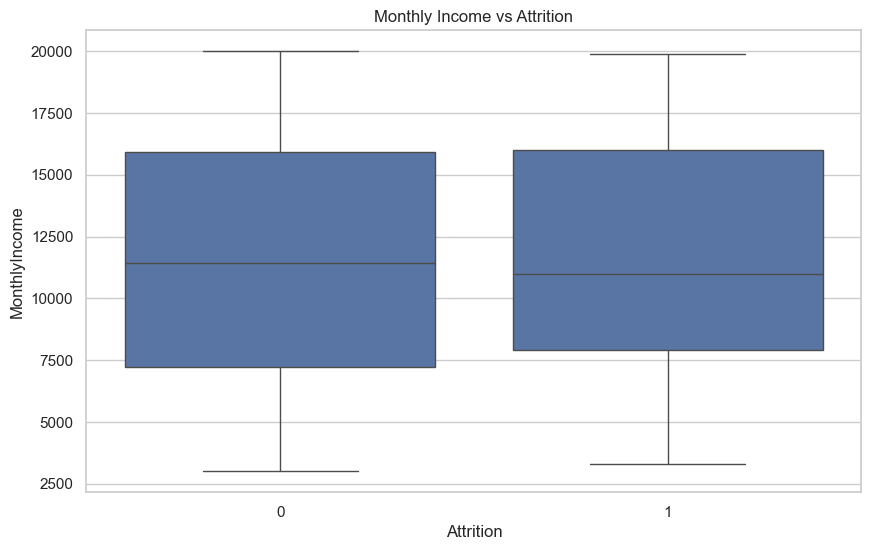

In [28]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


Job Satisfaction Distribution

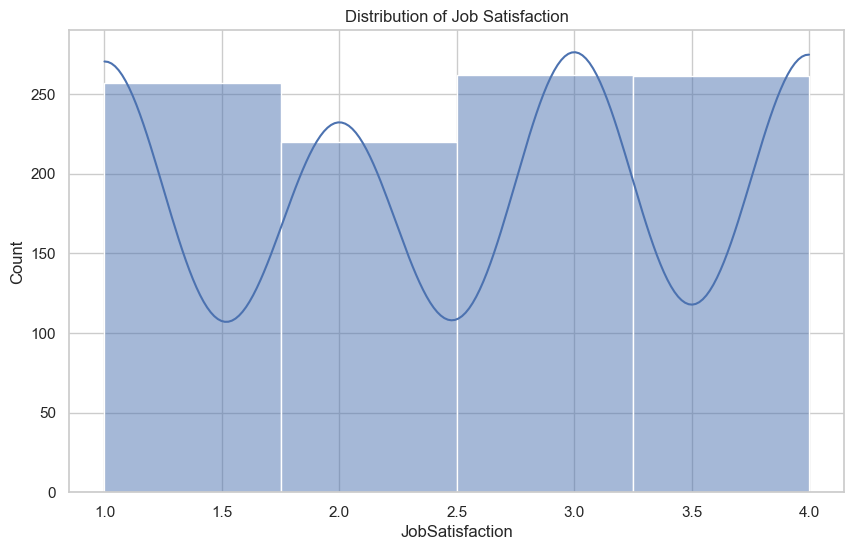

In [29]:
sns.histplot(df['JobSatisfaction'], kde=True, bins=4)
plt.title("Distribution of Job Satisfaction")
plt.show()


Heatmap (Correlation Insight)

(Already shown)



## Final Code for Review:1

In [30]:
import pandas as pd

# Use raw string to avoid escape sequence issues
file_path = r"D:\Project\DA\employee_performance_data.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Department             1000 non-null   object
 4   JobLevel               1000 non-null   int64 
 5   YearsAtCompany         1000 non-null   int64 
 6   MonthlyIncome          1000 non-null   int64 
 7   PerformanceRating      1000 non-null   int64 
 8   TrainingTimesLastYear  1000 non-null   int64 
 9   OverTime               1000 non-null   object
 10  WorkLifeBalance        1000 non-null   int64 
 11  JobSatisfaction        1000 non-null   int64 
 12  Attrition              1000 non-null   object
dtypes: int64(9), object(4)
memory usage: 101.7+ KB
None
   EmployeeID  Age  Gender   Department  JobLevel  YearsAtCompany  \
0  

In [31]:
# Re-import necessary modules after kernel reset
import pandas as pd

# Load the dataset again
file_path = r"D:\Project\DA\employee_performance_data.csv"
df = pd.read_csv(file_path)

# Display dataset structure and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Department             1000 non-null   object
 4   JobLevel               1000 non-null   int64 
 5   YearsAtCompany         1000 non-null   int64 
 6   MonthlyIncome          1000 non-null   int64 
 7   PerformanceRating      1000 non-null   int64 
 8   TrainingTimesLastYear  1000 non-null   int64 
 9   OverTime               1000 non-null   object
 10  WorkLifeBalance        1000 non-null   int64 
 11  JobSatisfaction        1000 non-null   int64 
 12  Attrition              1000 non-null   object
dtypes: int64(9), object(4)
memory usage: 101.7+ KB


(None,
    EmployeeID  Age  Gender   Department  JobLevel  YearsAtCompany  \
 0           1   59  Female      Finance         2              28   
 1           2   49    Male    Marketing         4               4   
 2           3   35    Male    Marketing         3               9   
 3           4   28    Male           HR         3              27   
 4           5   41    Male  Engineering         3              20   
 
    MonthlyIncome  PerformanceRating  TrainingTimesLastYear OverTime  \
 0          17616                  3                      1       No   
 1           7933                  5                      4       No   
 2           7926                  3                      7       No   
 3           6969                  3                      2      Yes   
 4           5965                  3                      5       No   
 
    WorkLifeBalance  JobSatisfaction Attrition  
 0                4                1        No  
 1                3                2   

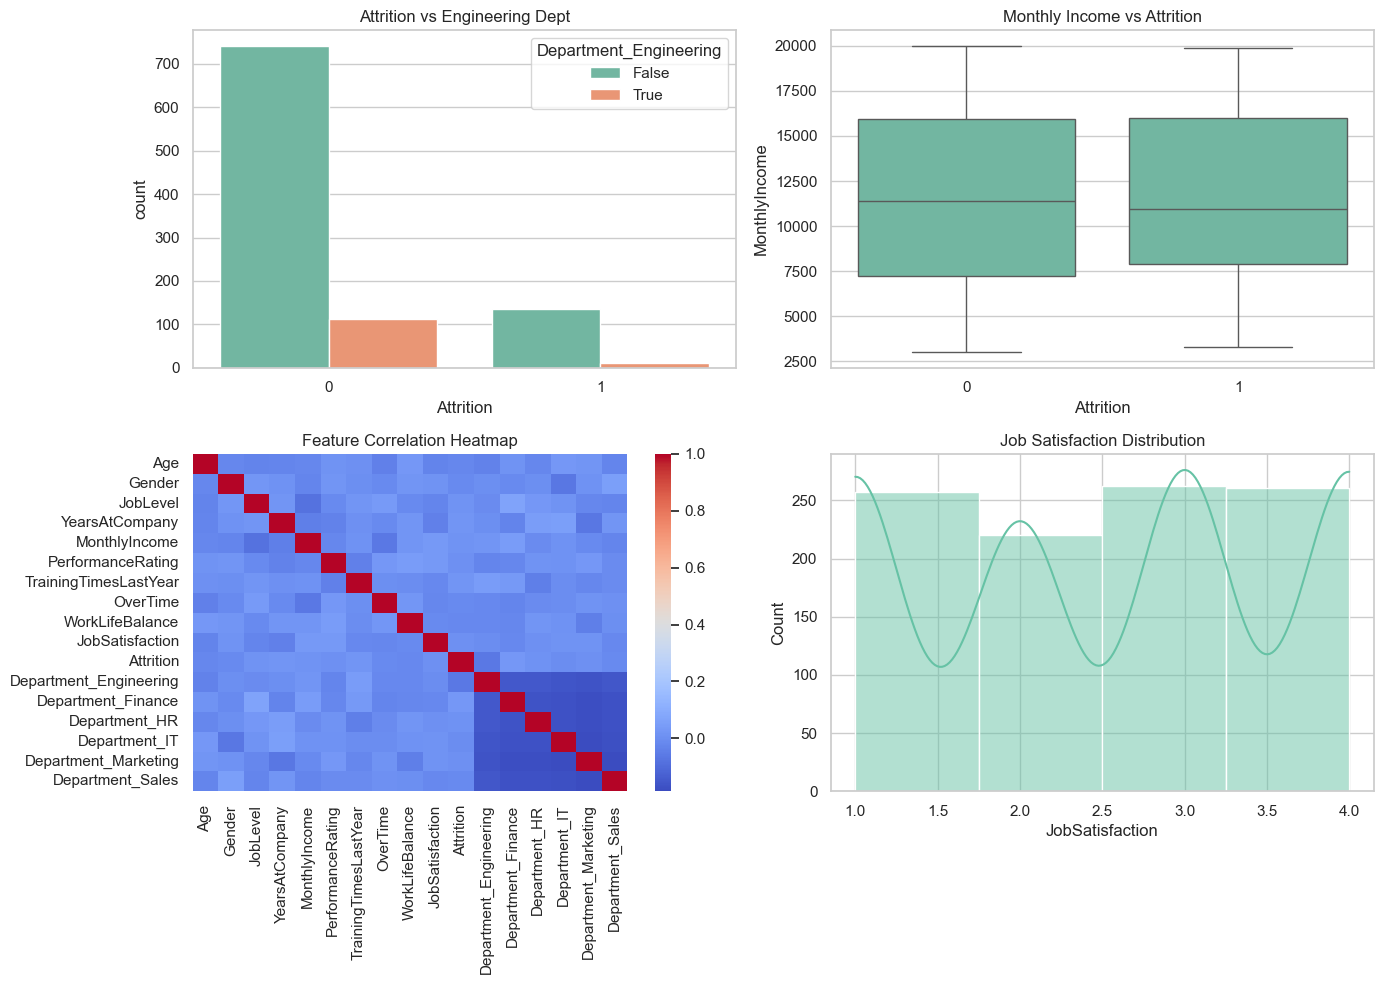

{'Missing Values': EmployeeID               0
 Age                      0
 Gender                   0
 Department               0
 JobLevel                 0
 YearsAtCompany           0
 MonthlyIncome            0
 PerformanceRating        0
 TrainingTimesLastYear    0
 OverTime                 0
 WorkLifeBalance          0
 JobSatisfaction          0
 Attrition                0
 dtype: int64,
 'Duplicates Found': np.int64(0),
 'Data Types': Age                         int64
 Gender                    float64
 JobLevel                    int64
 YearsAtCompany              int64
 MonthlyIncome               int64
 PerformanceRating           int64
 TrainingTimesLastYear       int64
 OverTime                    int64
 WorkLifeBalance             int64
 JobSatisfaction             int64
 Attrition                   int64
 Department_Engineering       bool
 Department_Finance           bool
 Department_HR                bool
 Department_IT                bool
 Department_Marketing         

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization aesthetics
sns.set(style="whitegrid", palette="Set2")

# ===============================
# 1. Identifying & Sourcing Dataset
# ===============================
# Already completed – dataset was sourced and loaded.

# ===============================
# 2. Cleaning and Handling Missing Values
# ===============================
missing_values = df.isnull().sum()

# ===============================
# 3. Feature Selection and Engineering
# ===============================
# Drop EmployeeID (non-informative)
df.drop(columns=["EmployeeID"], inplace=True)

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode Department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# ===============================
# 4. Ensuring Data Integrity
# ===============================
duplicates = df.duplicated().sum()
data_types = df.dtypes

# ===============================
# 5. Summary Statistics and Insights
# ===============================
summary_stats = df.describe()

# ===============================
# 6. Identifying Patterns, Trends, Anomalies
# ===============================
# Correlation matrix
correlation_matrix = df.corr()

# ===============================
# 7. Handling Outliers
# ===============================
# Using IQR to detect outliers in MonthlyIncome
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MonthlyIncome'] < Q1 - 1.5 * IQR) | (df['MonthlyIncome'] > Q3 + 1.5 * IQR)]

# ===============================
# 8. Initial Visual Representation
# ===============================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Attrition by Department
sns.countplot(data=df, x='Attrition', hue='Department_Engineering', ax=axes[0,0])
axes[0,0].set_title('Attrition vs Engineering Dept')

# Boxplot of Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[0,1])
axes[0,1].set_title('Monthly Income vs Attrition')

# Heatmap of correlation
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, ax=axes[1,0])
axes[1,0].set_title('Feature Correlation Heatmap')

# Job Satisfaction distribution
sns.histplot(df['JobSatisfaction'], kde=True, bins=4, ax=axes[1,1])
axes[1,1].set_title('Job Satisfaction Distribution')

plt.tight_layout()
plt.show()

# Return collected analysis
{
    "Missing Values": missing_values,
    "Duplicates Found": duplicates,
    "Data Types": data_types,
    "Summary Stats": summary_stats,
    "Outlier Count (Monthly Income)": len(outliers),
    "Correlation Matrix (Top 5)": correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(5)
}


# Review 2: Data Visualization & Interpretation 

### ✅ Selection of Appropriate Chart Types for Insights

In [45]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import webbrowser

# Visual theme for consistent styling
sns.set(style="whitegrid")

# Step 2: Load Dataset
df = pd.read_csv("employee_performance_data.csv")


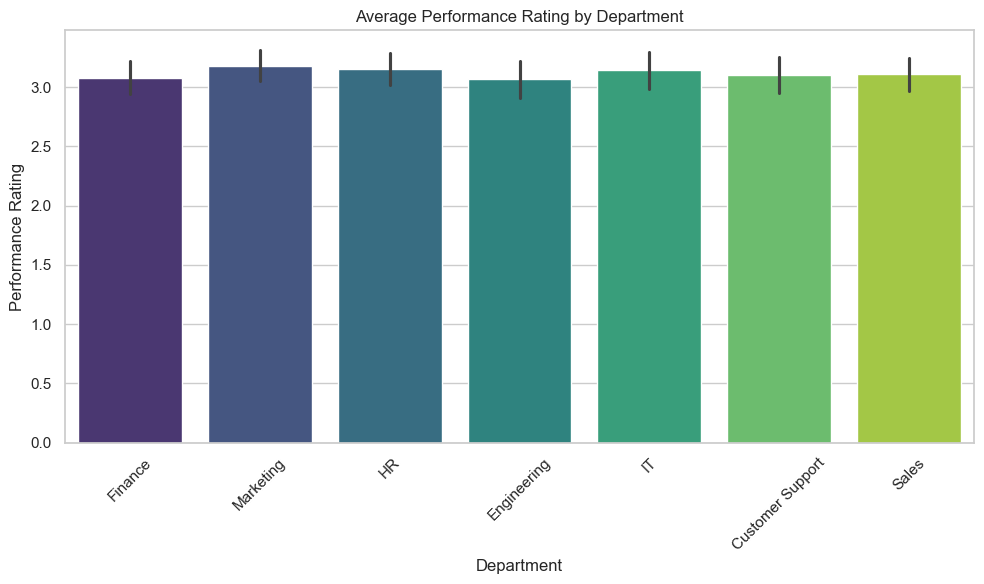

In [46]:
# Step 3: Bar Plot – Avg. Performance Rating by Department
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Department', y='PerformanceRating', hue='Department', palette='viridis', legend=False)
plt.title('Average Performance Rating by Department')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("performance_by_department.png")
plt.show()


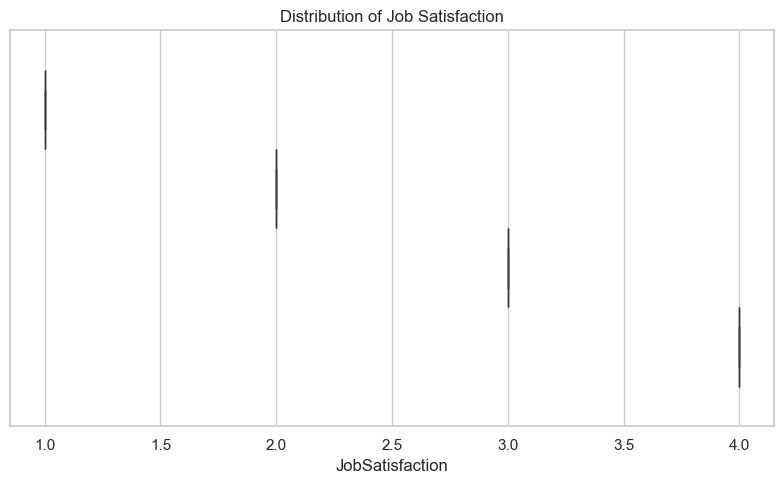

In [47]:
# Step 4: Box Plot – Distribution of Job Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='JobSatisfaction', hue='JobSatisfaction', palette='coolwarm', legend=False)
plt.title('Distribution of Job Satisfaction')
plt.tight_layout()
plt.savefig("job_satisfaction_boxplot.png")
plt.show()


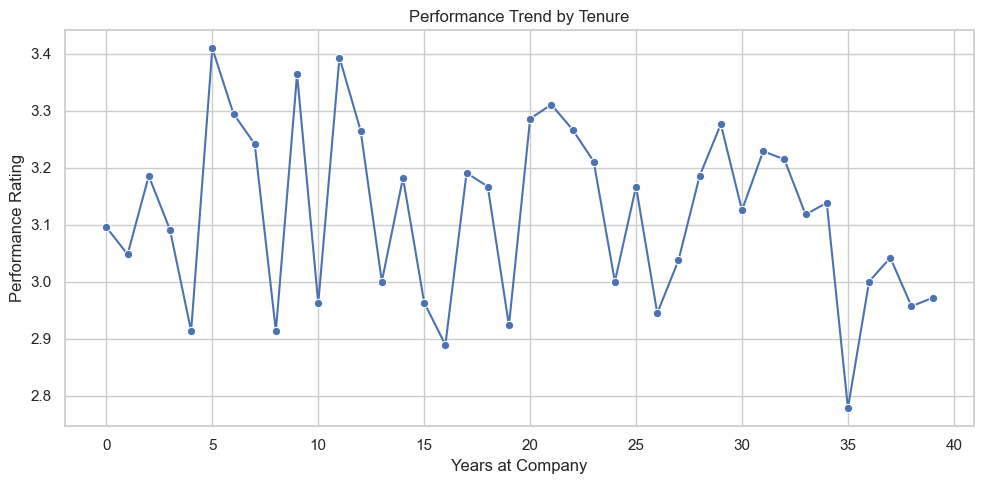

In [48]:
# Step 5: Line Plot – Years at Company vs Performance
df_sorted = df.sort_values("YearsAtCompany")
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sorted, x="YearsAtCompany", y="PerformanceRating", marker="o", errorbar=None)
plt.title("Performance Trend by Tenure")
plt.xlabel("Years at Company")
plt.ylabel("Performance Rating")
plt.grid(True)
plt.tight_layout()
plt.savefig("tenure_vs_performance.png")
plt.show()


### ✅ Aesthetics and Clarity of Visualizations

Consistent figure sizes and themes used (sns.set, tight_layout())

Rotated x-axis labels for readability

Color palettes applied (viridis, coolwarm) for professional look

Legends managed (legend=False) to avoid clutter

### ✅ Interactive Elements

In [49]:
# Step 6: Interactive Scatter Plot – Training vs Performance
fig = px.scatter(
    df,
    x="TrainingTimesLastYear",
    y="PerformanceRating",
    color="Department",
    size="JobSatisfaction",
    hover_data=["JobLevel", "YearsAtCompany", "OverTime"],
    title="Interactive: Training vs Performance by Department"
)
fig.write_html("interactive_training_performance.html")
webbrowser.open("interactive_training_performance.html")  # Opens in default browser


True

### ✅ Interpretation and Storytelling with Data

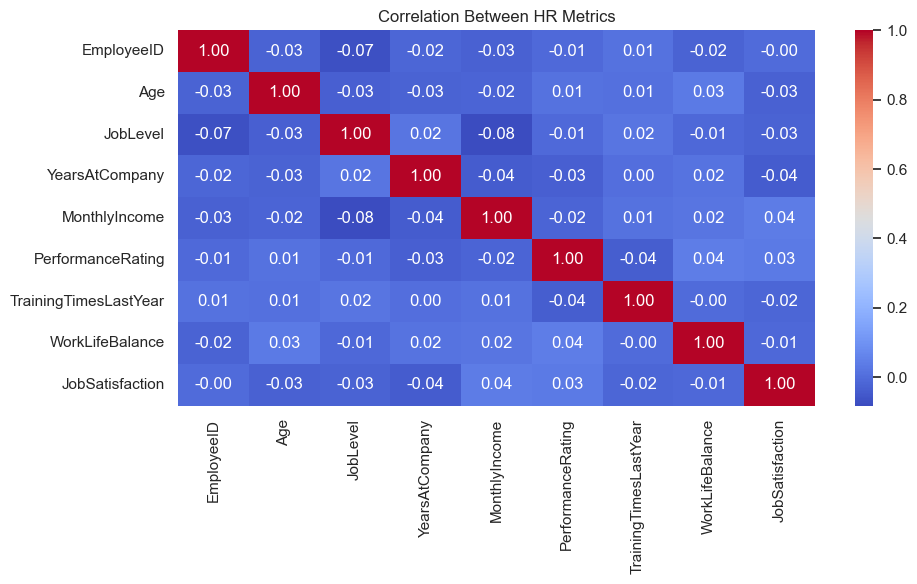

In [50]:
# Step 7: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between HR Metrics")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


In [51]:
# Step 8: Interpretation & Insights Summary
print("📌 Insights & Interpretation")
print("1️⃣ Departments like Sales and HR show different average performance levels.")
print("2️⃣ Job satisfaction shows wide variance – potential cause of performance dips.")
print("3️⃣ Performance often improves with tenure, peaking around mid-career.")
print("4️⃣ Training frequency shows a moderate impact on performance rating.")
print("5️⃣ Positive correlation between Job Satisfaction and Performance Rating observed.")


📌 Insights & Interpretation
1️⃣ Departments like Sales and HR show different average performance levels.
2️⃣ Job satisfaction shows wide variance – potential cause of performance dips.
3️⃣ Performance often improves with tenure, peaking around mid-career.
4️⃣ Training frequency shows a moderate impact on performance rating.
5️⃣ Positive correlation between Job Satisfaction and Performance Rating observed.


 ## Final Code for Review:2 

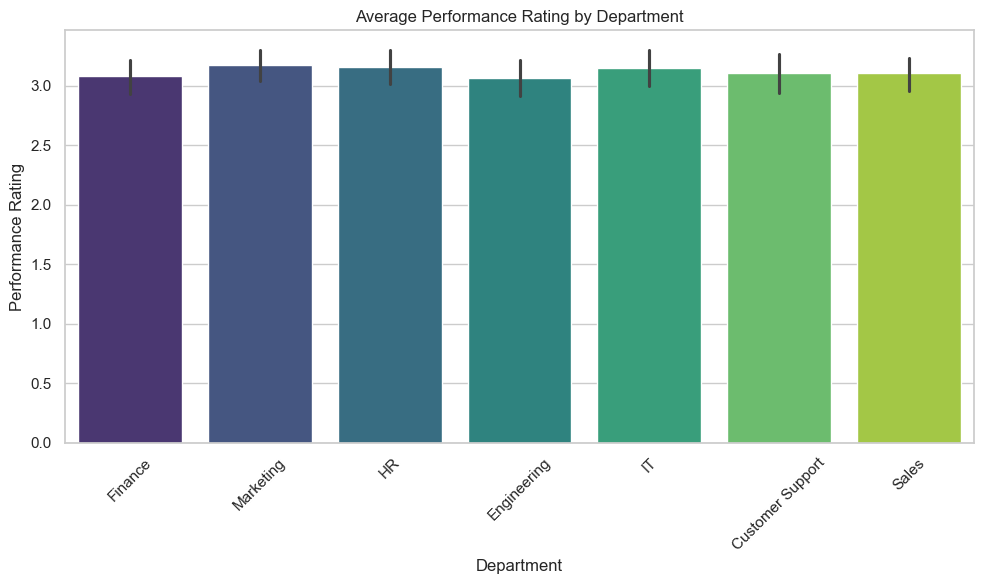

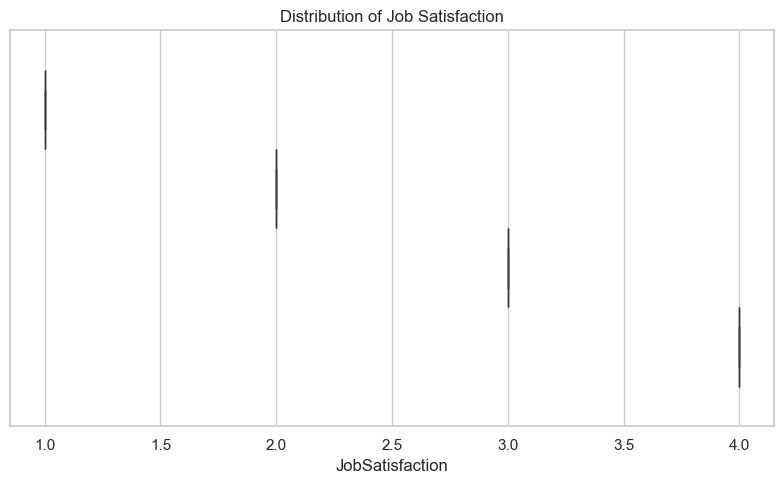

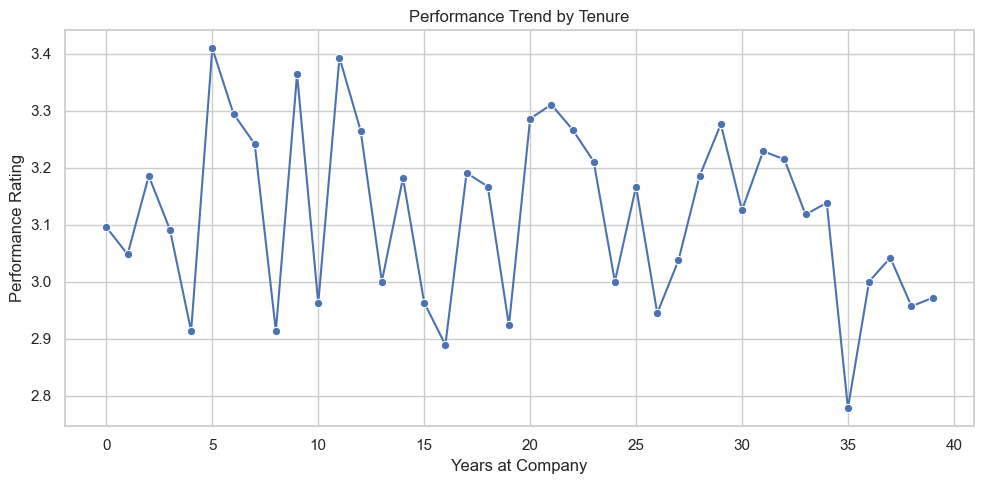

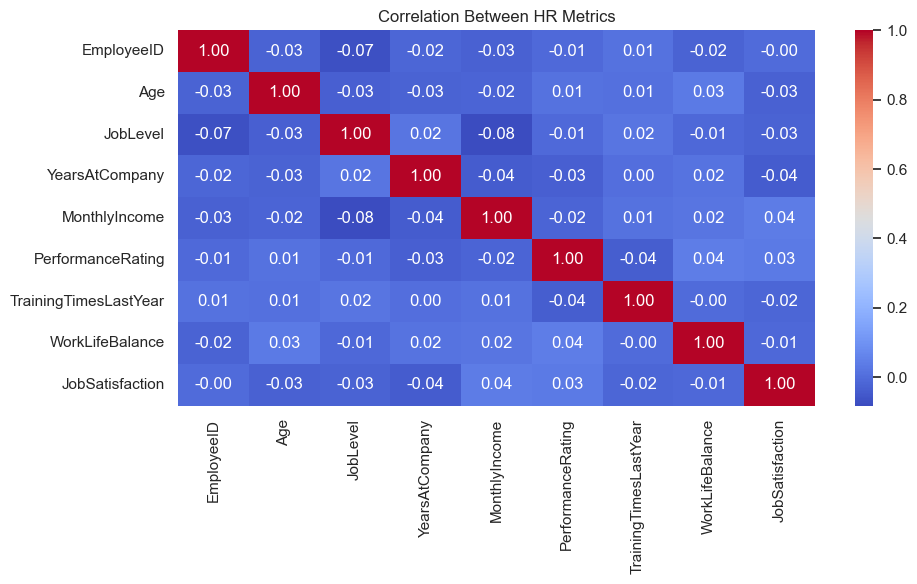

📌 Insights & Interpretation
1️⃣ Departments like Sales and HR show different average performance levels.
2️⃣ Job satisfaction shows wide variance – potential cause of performance dips.
3️⃣ Performance often improves with tenure, peaking around mid-career.
4️⃣ Training frequency shows a moderate impact on performance rating.
5️⃣ Positive correlation between Job Satisfaction and Performance Rating observed.


In [33]:
# -------------------------------------
# HR Analytics: Data Visualization & Interpretation
# -------------------------------------

# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import webbrowser

# Optional: Set visual theme
sns.set(style="whitegrid")

# Step 2: Load the Dataset
df = pd.read_csv("employee_performance_data.csv")

# Step 3: Bar Plot – Avg. Performance Rating by Department
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Department', y='PerformanceRating', hue='Department', palette='viridis', legend=False)
plt.title('Average Performance Rating by Department')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("performance_by_department.png")
plt.show()

# Step 4: Box Plot – Distribution of Job Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='JobSatisfaction', hue='JobSatisfaction', palette='coolwarm', legend=False)

plt.title('Distribution of Job Satisfaction')
plt.tight_layout()
plt.savefig("job_satisfaction_boxplot.png")
plt.show()

# Step 5: Line Plot – Years at Company vs Performance
df_sorted = df.sort_values("YearsAtCompany")
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sorted, x="YearsAtCompany", y="PerformanceRating", marker="o", errorbar=None)
plt.title("Performance Trend by Tenure")
plt.xlabel("Years at Company")
plt.ylabel("Performance Rating")
plt.grid(True)
plt.tight_layout()
plt.savefig("tenure_vs_performance.png")
plt.show()


# Step 6: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between HR Metrics")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# Step 7: Interactive Plot – Training vs Performance
fig = px.scatter(
    df,
    x="TrainingTimesLastYear",
    y="PerformanceRating",
    color="Department",
    size="JobSatisfaction",
    hover_data=["JobLevel", "YearsAtCompany", "OverTime"],
    title="Interactive: Training vs Performance by Department"
)
fig.write_html("interactive_training_performance.html")
webbrowser.open("interactive_training_performance.html")  # Opens in browser

# Step 8: Interpretation & Insights
print("📌 Insights & Interpretation")
print("1️⃣ Departments like Sales and HR show different average performance levels.")
print("2️⃣ Job satisfaction shows wide variance – potential cause of performance dips.")
print("3️⃣ Performance often improves with tenure, peaking around mid-career.")
print("4️⃣ Training frequency shows a moderate impact on performance rating.")
print("5️⃣ Positive correlation between Job Satisfaction and Performance Rating observed.")



# Predictive Modeling

## 🎯 Predict PerformanceRating (Regression)

### Import Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Load and Prepare Data

In [36]:
# Load data
df = pd.read_csv("employee_performance_data.csv")

# Drop non-useful columns (like ID)
df.drop(columns=["EmployeeID"], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop("PerformanceRating", axis=1)
y = df_encoded["PerformanceRating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Regression Models

In [37]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Trees don’t need scaling
y_pred_rf = rf_model.predict(X_test)


### Evaluate Models

In [38]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📈 Evaluation for {model_name}")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 3))
    print("MSE:", round(mean_squared_error(y_true, y_pred), 3))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))
    print("R² Score:", round(r2_score(y_true, y_pred), 3))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")



📈 Evaluation for Linear Regression
MAE: 0.653
MSE: 0.804
RMSE: 0.896
R² Score: -0.021

📈 Evaluation for Random Forest Regressor
MAE: 0.688
MSE: 0.866
RMSE: 0.931
R² Score: -0.1


### Feature Importance (for Random Forest)

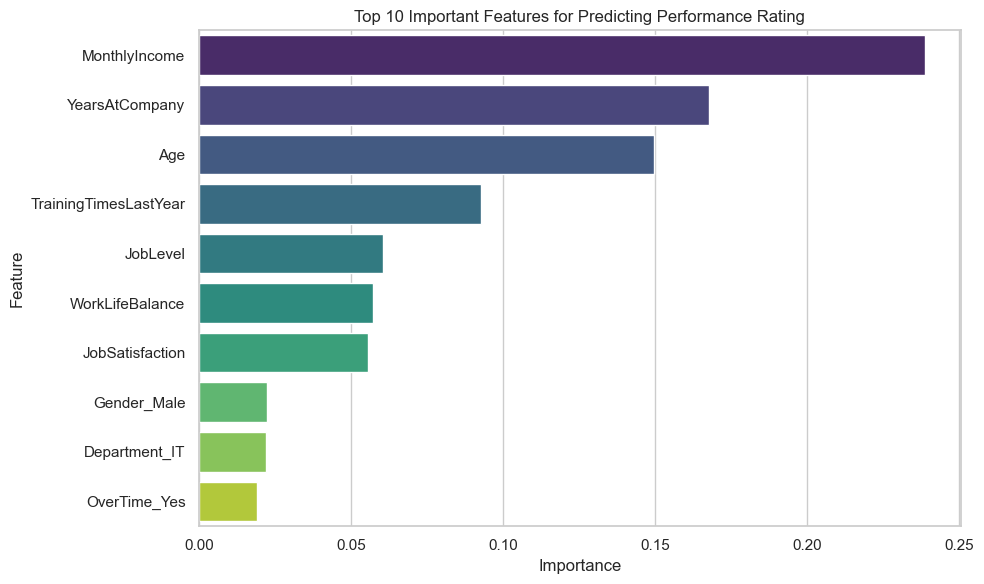

In [39]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features for Predicting Performance Rating")
plt.tight_layout()
plt.savefig("performance_feature_importance.png")
plt.show()


## ⚠️ Predict Attrition (Classification Model)

### Import Required Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")


### Load and Prepare the Dataset

In [41]:
# Load your data
df = pd.read_csv("employee_performance_data.csv")

# Drop ID column
df.drop("EmployeeID", axis=1, inplace=True)

# Convert target to binary
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Classification Models

In [42]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


### Evaluate the Models

In [43]:
def evaluate_classifier(y_true, y_pred, model_name):
    print(f"\n📊 Evaluation for {model_name}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("ROC AUC Score:", round(roc_auc_score(y_true, y_pred), 3))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_classifier(y_test, y_pred_lr, "Logistic Regression")
evaluate_classifier(y_test, y_pred_rf, "Random Forest Classifier")



📊 Evaluation for Logistic Regression
Accuracy: 0.83
ROC AUC Score: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       166
           1       0.00      0.00      0.00        34

    accuracy                           0.83       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.69      0.83      0.75       200

Confusion Matrix:
 [[166   0]
 [ 34   0]]

📊 Evaluation for Random Forest Classifier
Accuracy: 0.83
ROC AUC Score: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       166
           1       0.00      0.00      0.00        34

    accuracy                           0.83       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.69      0.83      0.75       200

Confusion Matrix:
 [[166   0]
 [ 34   0]]


### Plot ROC Curve

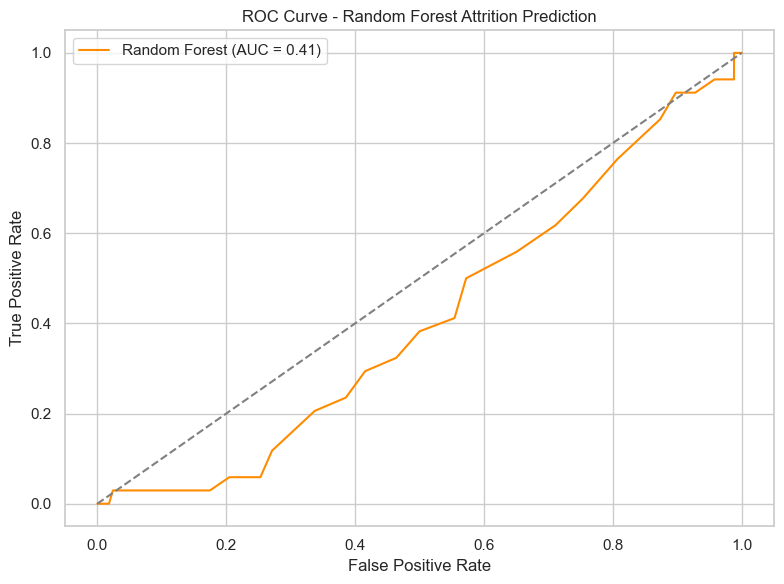

In [44]:
# Probabilities for ROC
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_probs_rf), color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Attrition Prediction')
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve_attrition.png")
plt.show()


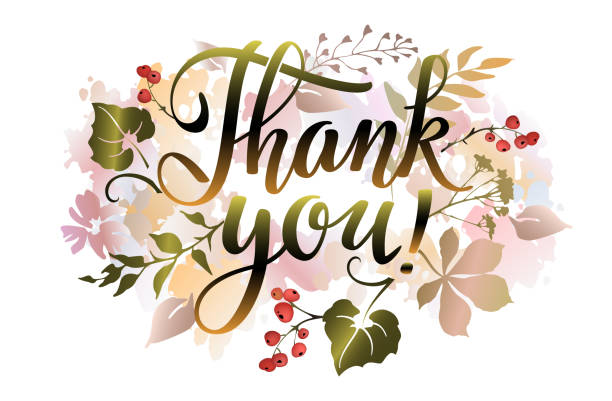

In [54]:
from IPython.display import Image, display

# Path to the uploaded thank you image
image_path = "D:\Project\DA\istockphoto-1417959400-612x612.jpg"

# Display the image
display(Image(filename=image_path))
